# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn.impute import SimpleImputer


%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# resposta 1 

y, X = patsy.dmatrices('tip ~ sex + smoker + size + net_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  sex[T.Female]  smoker[T.No]  size  net_bill
          1              1             1     2     15.98
          1              0             1     3      8.68
          1              0             1     3     17.51
          1              0             1     2     20.37
          1              1             1     4     20.98
  Terms:
    'Intercept' (column 0)
    'sex' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'net_bill' (column 4)

In [4]:
# resposta 2

reg = smf.ols('tip ~ size + net_bill', data = tips).fit()

In [5]:
tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           8.15e-25
Time:                        10:30:50   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.000       0.436       1.260
size           0.3402      0.091      3.727      0.000       0.160       0.520
net_bill       0.0760      0.011      7.032      0.000       0.055       0.097
==============================================================================
Omnibus:                       43.472   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.448
Skew:                           0.887   Prob(JB):                     6.22e-20
Kurtosis:                       5.356   Cond. No.                         57.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

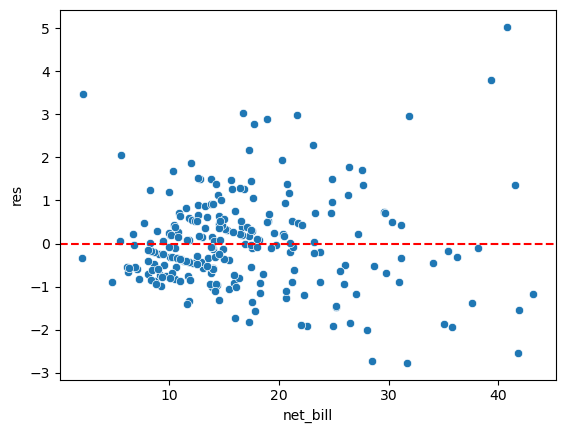

In [6]:
# resposta 3
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')


In [17]:
#Log de net_bill

reg = smf.ols('tip ~ np.log(net_bill) + size', data = tips).fit()
tips['res'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     63.02
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           9.66e-23
Time:                        10:34:54   Log-Likelihood:                -373.63
No. Observations:                 244   AIC:                             753.3
Df Residuals:                     241   BIC:                             763.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0708      0.418     -2.562      0.011      -1.894      -0.247
np.log(net_bill)     1.1308      0.183      6.178      0.000       0.770       1.491
size                 0.3903      0.092      4.239      0.000       0.209       0.572
==============================================================================
Omnibus:                       74.760   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.807
Skew:                           1.295   Prob(JB):                     6.24e-52
Kurtosis:                       7.060   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# polinômio de net_bill

reg_tip = smf.ols('tip ~ np.power(net_bill, 2)', data=tips).fit()
tips['res_tip'] = reg_tip.resid
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           1.47e-20
Time:                        10:34:30   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O melhor modelo para ser escolhido é o primeiro, pois o seu R² é 0.369, sendo maior que o segundo modelo com log de net_bill

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [21]:
#resposta 1

reg_tip_pct_1 = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()
tips['res_tip_pct_1'] = reg_tip_pct_1.resid
reg_tip_pct_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           2.64e-20
Time:                        10:38:07   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#resposta 2

reg_tip_pct_2 = smf.ols('tip_pct ~ smoker + net_bill', data=tips).fit()
tips['res_tip_pct_2'] = reg_tip_pct_2.resid
reg_tip_pct_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     13.77
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           2.17e-06
Time:                        10:38:30   Log-Likelihood:                 109.52
No. Observations:                 244   AIC:                            -213.0
Df Residuals:                     241   BIC:                            -202.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3309      0.027     12.087      0.000       0.277       0.385
smoker[T.No]    -0.0358      0.021     -1.739      0.083      -0.076       0.005
net_bill        -0.0063      0.001     -5.093      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      464.437   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224133.702
Skew:                          10.904   Prob(JB):                         0.00
Kurtosis:                     149.869   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

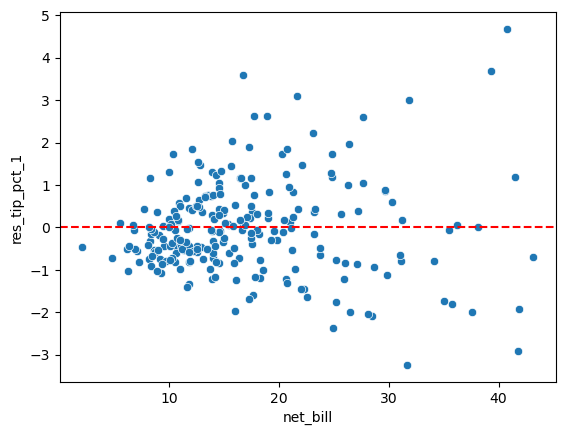

In [24]:
# resposta 3

plt.close('all')
sns.scatterplot(x='net_bill', y='res_tip_pct_1', data=tips[tips['tip_pct'] < .5])
plt.axhline(y=0, color='r', linestyle='--')


In [25]:
#Resposta 4

reg_tip_pct_3 = smf.ols('tip_pct ~ smoker + np.log(net_bill)', data=tips).fit()
tips['res_tip_pct_3'] = reg_tip_pct_3.resid
reg_tip_pct_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     32.17
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           4.13e-13
Time:                        10:40:44   Log-Likelihood:                 125.19
No. Observations:                 244   AIC:                            -244.4
Df Residuals:                     241   BIC:                            -233.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6412      0.056     11.533      0.000       0.532       0.751
smoker[T.No]        -0.0319      0.019     -1.657      0.099      -0.070       0.006
np.log(net_bill)    -0.1547      0.020     -7.907      0.000      -0.193      -0.116
==============================================================================
Omnibus:                      436.655   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163563.737
Skew:                           9.667   Prob(JB):                         0.00
Kurtosis:                     128.357   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
reg_tip_pct_4 = smf.ols('tip_pct ~ smoker + np.power(net_bill, 2)', data=tips).fit()
tips['res_tip_pct_4'] = reg_tip_pct_4.resid
reg_tip_pct_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.215
Date:                Fri, 19 Jul 2024   Prob (F-statistic):           0.000354
Time:                        10:40:46   Log-Likelihood:                 104.37
No. Observations:                 244   AIC:                            -202.7
Df Residuals:                     241   BIC:                            -192.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2628      0.020     13.064      0.000       0.223       0.302
smoker[T.No]             -0.0355      0.021     -1.687      0.093      -0.077       0.006
np.power(net_bill, 2)    -0.0001    2.9e-05     -3.859      0.000      -0.000   -5.47e-05
==============================================================================
Omnibus:                      467.947   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           232494.687
Skew:                          11.070   Prob(JB):                         0.00
Kurtosis:                     152.593   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Resposta 5

print(f"R² do Modelo 1: {reg_tip_pct_1.rsquared*100:.2f}%")
print(f"R² do Modelo 3: {reg_tip_pct_3.rsquared*100:.2f}%")

R² do Modelo 1: 33.52%
R² do Modelo 3: 21.07%


O modelo do item 2 tem o melhor coeficiente de determinação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
df = pd.read_csv('previsao_de_renda.csv')

df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [30]:
# Resposta 1
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res_renda_simples'] = reg_renda_simples.resid
reg_renda_simples.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:42:36   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

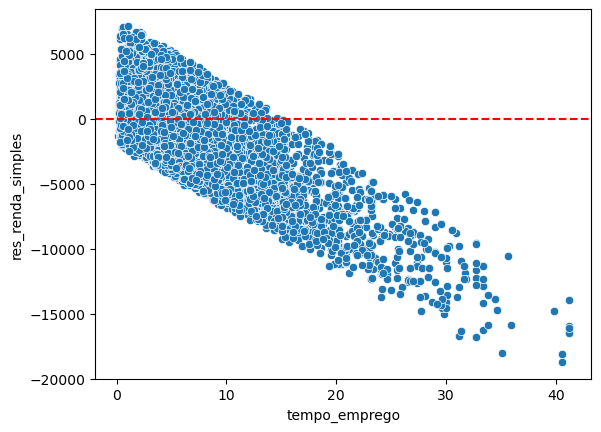

In [31]:
# tratando outlier de renda para facilitar a visualização
plt.close('all')
sns.scatterplot(x='tempo_emprego', y='res_renda_simples', data=df[df['renda'] < 10000])
# sns.scatterplot(x='tempo_emprego', y='res_renda_simples', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [32]:
# log em y
reg_renda_simples_2 = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()
df['res_renda_simples_2'] = reg_renda_simples_2.resid
reg_renda_simples_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:43:01   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

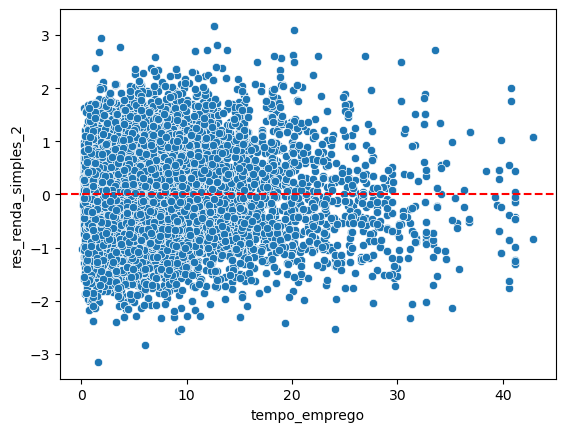

In [33]:
plt.close('all')
sns.scatterplot(x='tempo_emprego', y='res_renda_simples_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

In [34]:
print(f"O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.")
print(f"R² do Modelo 1: {reg_renda_simples.rsquared*100:.2f}%")
print(f"R² do Modelo 2: {reg_renda_simples_2.rsquared*100:.2f}%")

O R² do segundo modelo diminuiu, porém, o 'coef' e 'std err' se aproximaram de 0.
R² do Modelo 1: 14.82%
R² do Modelo 2: 17.11%


In [36]:

reg_renda_multi = smf.ols('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
df['res_renda_multi'] = reg_renda_multi.resid
reg_renda_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     112.7
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:43:43   Log-Likelihood:            -1.2878e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12388   BIC:                         2.579e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5879.4874   2515.712     -2.337      0.019   -1.08e+04    -948.300
data_ref[T.2015-02-01]             -50.5760    377.087     -0.134      0.893    -789.726     688.574
data_ref[T.2015-03-01]             224.3334    378.075      0.593      0.553    -516.753     965.420
data_ref[T.2015-04-01]             644.2383    376.941      1.709      0.087     -94.624    1383.101
data_ref[T.2015-05-01]             177.6984    375.907      0.473      0.636    -559.138     914.535
data_ref[T.2015-06-01]             642.5355    377.474      1.702      0.089     -97.373    1382.444
data_ref[T.2015-07-01]             368.1166    376.181      0.979      0.328    -369.256    1105.490
data_ref[T.2015-08-01]             210.0260    377.469      0.556      0.578    -529.872     949.924
data_ref[T.2015-09-01]             153.4899    374.937      0.409      0.682    -581.446     888.425
data_ref[T.2015-10-01]             270.5873    377.498      0.717      0.474    -469.367    1010.542
data_ref[T.2015-11-01]             445.9166    377.674      1.181      0.238    -294.384    1186.217
data_ref[T.2015-12-01]             621.5670    378.978      1.640      0.101    -121.289    1364.423
data_ref[T.2016-01-01]             302.8712    377.441      0.802      0.422    -436.972    1042.715
data_ref[T.2016-02-01]             -41.6680    377.355     -0.110      0.912    -781.342     698.006
data_ref[T.2016-03-01]              57.9217    380.707      0.152      0.879    -688.323     804.166
sexo[T.M]                         6054.7914    155.926     38.831      0.000    5749.152    6360.431
posse_de_veiculo[T.True]            48.1619    150.456      0.320      0.749    -246.755     343.079
posse_de_imovel[T.True]            363.7476    148.821      2.444      0.015      72.035     655.460
tipo_renda[T.Bolsista]           -1285.7818   2566.067     -0.501      0.616   -6315.672    3744.108
tipo_renda[T.Empresário]           829.2786    158.912      5.218      0.000     517.786    1140.771
tipo_renda[T.Pensionista]        -2725.7882   2566.941     -1.062      0.288   -7757.392    2305.816
tipo_renda[T.Servidor público]     138.7937    236.527      0.587      0.557    -324.836     602.424
educacao[T.Pós graduação]         1017.3601   1691.601      0.601      0.548   -2298.441    4333.161
educacao[T.Secundário]             570.3332    766.157      0.744      0.457    -931.455    2072.121
educacao[T.Superior completo]     1185.7821    769.133      1.542      0.123    -321.837    2693.402
educacao[T.Superior incompleto]    166.9395    827.796      0.202      0.840   -1455.669    1789.548
estado_civil[T.Separado]          1164.5763   1183.767      0.984      0.325   -1155.791    3484.944
estado_civil[T.Solteiro]           825.4338   1158.89

In [37]:
reg_renda_multi_2 = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + np.power(idade, 2) + tempo_emprego',data=df).fit()
df['res_renda_multi_2'] = reg_renda_multi_2.resid
reg_renda_multi_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1315.
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:44:01   Log-Likelihood:                -13677.
No. Observations:               12427   AIC:                         2.737e+04
Df Residuals:                   12421   BIC:                         2.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.3431      0.020    366.593      0.000       7.304       7.382
sexo[T.M]                    0.7691      0.015     52.828      0.000       0.741       0.798
posse_de_veiculo[T.True]     0.0585      0.014      4.153      0.000       0.031       0.086
posse_de_imovel[T.True]      0.0882      0.014      6.394      0.000       0.061       0.115
np.power(idade, 2)        5.099e-05   8.78e-06      5.804      0.000    3.38e-05    6.82e-05
tempo_emprego                0.0611      0.001     59.359      0.000       0.059       0.063
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.211
Skew:                           0.022   Prob(JB):                        0.546
Kurtosis:                       3.020   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
print(f"R² do Modelo 1: {reg_renda_multi.rsquared*100:.2f}%")
print(f"R² do Modelo 2: {reg_renda_multi_2.rsquared*100:.2f}%")

R² do Modelo 1: 25.69%
R² do Modelo 2: 34.61%


<Axes: xlabel='sexo', ylabel='res_renda_multi_2'>

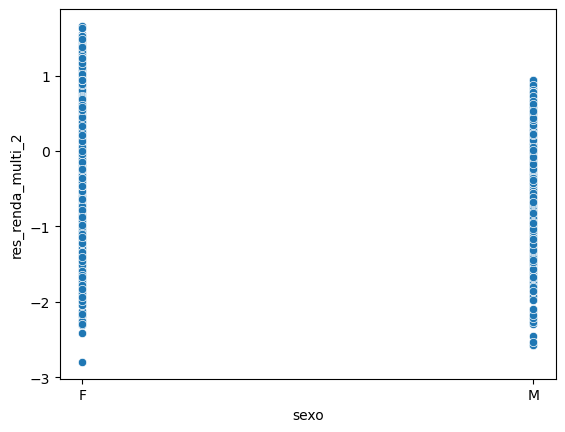

In [39]:
sns.scatterplot(x='sexo', y='res_renda_multi_2', data=df[df['renda'] < 10000])

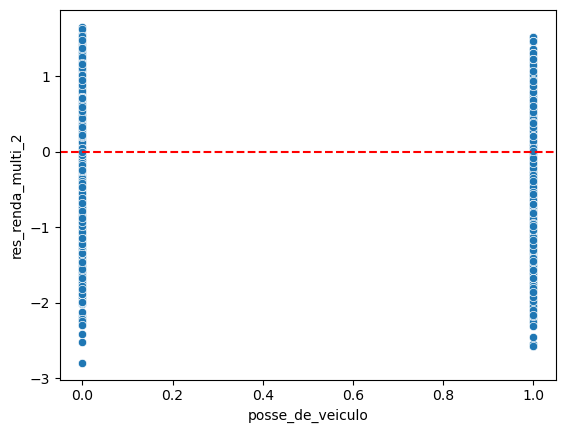

In [40]:
# resíduo veiculo
sns.scatterplot(x='posse_de_veiculo', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='veiculo', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

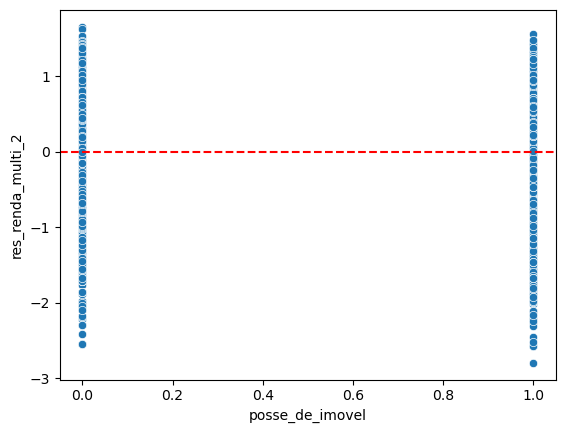

In [41]:
# resíduo posse de imovel
sns.scatterplot(x='posse_de_imovel', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='imovel', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

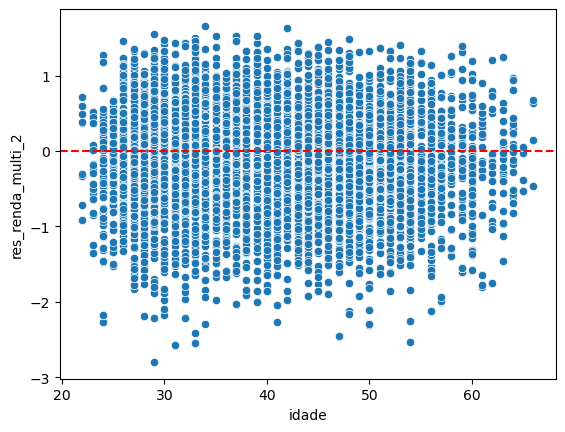

In [42]:
# resíduo idade
sns.scatterplot(x='idade', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='idade', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

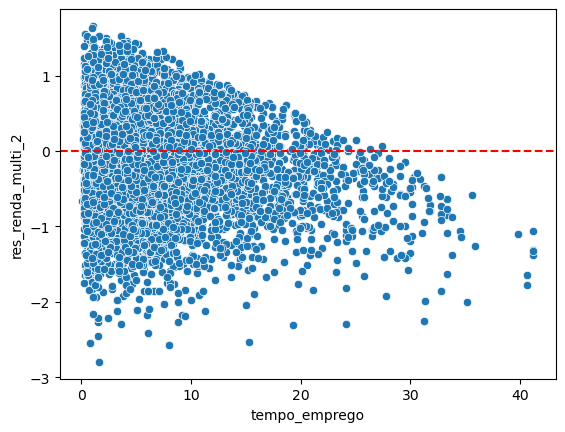

In [43]:
# resíduo tempo_emprego
sns.scatterplot(x='tempo_emprego', y='res_renda_multi_2', data=df[df['renda'] < 10000])
# sns.scatterplot(x='tempo_emprego', y='res_renda_multi_2', data=df)
plt.axhline(y=0, color='r', linestyle='--')

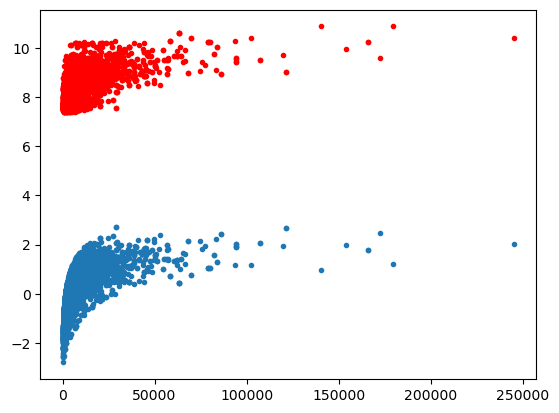

In [44]:
df['pred'] = reg_renda_multi_2.fittedvalues

plt.plot(df['renda'], df['res_renda_multi_2'], '.')
plt.plot(df['renda'], df['pred'], 'r.')

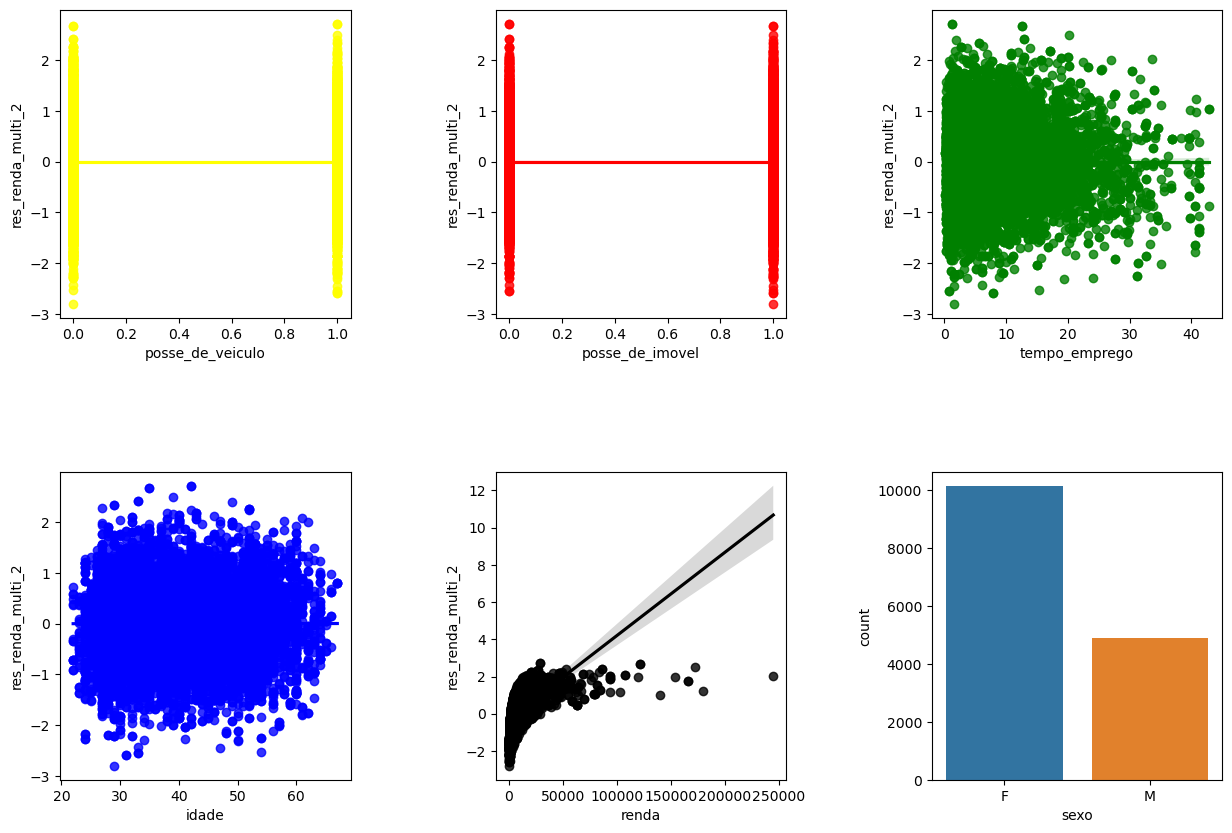

In [46]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=df['posse_de_veiculo'], y=df['res_renda_multi_2'], color='yellow');
sns.regplot(ax = axes[0, 1],x=df['posse_de_imovel'], y=df['res_renda_multi_2'], color='red');
sns.regplot(ax = axes[0, 2],x=df['tempo_emprego'], y=df['res_renda_multi_2'], color='green');
sns.regplot(ax = axes[1, 0],x=df['idade'], y=df['res_renda_multi_2'], color='blue');
sns.regplot(ax = axes[1, 1],x=df['renda'], y=df['res_renda_multi_2'], color='black');
sns.countplot(ax = axes[1, 2],x=df['sexo'], data=df['res_renda_multi_2']);


plt.subplots_adjust(wspace=0.5, hspace=0.5)